# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше

## Изучение данных из файла

Импортируем нужные библиотеки, проведем первичный анализ данных

In [52]:
import pandas as pd
import math as mt
import numpy as np
import pylab as plt
import seaborn as sea
from scipy import stats as st


In [53]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [54]:
display(calls.head())
display(internet.head())
display(messages.head())
display(tariffs.head())
display(users.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [55]:
display(calls.describe())
display(internet.describe())
display(messages.describe())
display(users.describe())

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [56]:
display(calls.info())
display(internet.info())
display(messages.info())
display(tariffs.info())
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [57]:
col_dict = [calls, internet, messages, tariffs, users]

for col in col_dict:
    print("------------------------------")
    display(col.head())
    display(col.describe())
    display(col.info())
    display(col.duplicated().sum())

------------------------------


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

0

------------------------------


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

0

------------------------------


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

0

------------------------------


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

0

------------------------------


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

0

Методом describe проверим информацию в таблицах. Не видно отрицательных значений и каких то аномальных выбросов в данных, данные кажутся нормальными. Можно почистить данные в таблицах с интернет трафиком, где нулевые значния, это не как со звонками, где это пропущенные значения. В типах данных ошибок также не вижу, разве что в формате даты, это мы исправим во втором пункте задачи

In [58]:
internet = internet.query('mb_used > 0') # уберем строки в которых интернет трафика нет


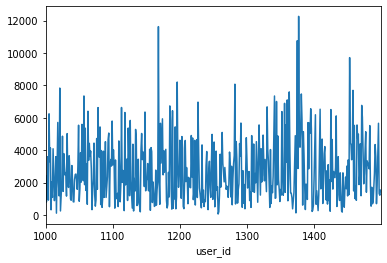

In [59]:
calls.groupby('user_id')['duration'].sum().plot()




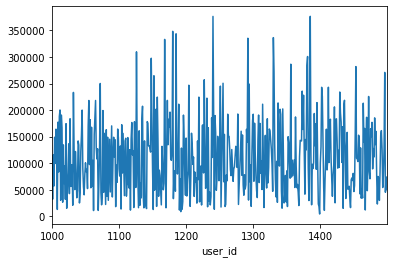

In [60]:
internet.groupby('user_id')['mb_used'].sum().plot()

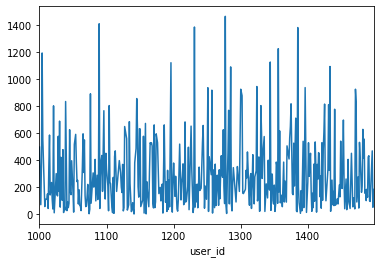

In [61]:
messages.groupby('user_id')['id'].count().plot()

**Вывод:**
* Данные мне показались по качеству очень даже неплохими, явных ошибок я в них не вижу. Есть проблемы в типах датах по дате, это мы дальше поправим. Нулевой трафи по интернету убрали, посмотрел по графику по пользователям сколько минут, мб и сообщений посылают, есть особо "ярые" пользователи в каждой категории. 

* Можно преступать к подготовке данных. Далее создадим сводную таблицу со сводными данными по интернету, звонкам и смс

## Подготовка данных

Посчитайте для каждого пользователя:

* количество сделанных звонков и израсходованных минут разговора по месяцам;

* количество отправленных сообщений по месяцам;

* объем израсходованного интернет-трафика по месяцам;

Создадим одну сводную таблицу с количеством интернета, звонков и сообщений отправленных пользователем. Переиминуем столбцы с id(дальше это особо не пригодилось, но логика была в том, что id ссесий были бы разные для сводной таблицы)


In [62]:
calls.rename(columns = {'id' :'id_calls'}, inplace = True)
internet.rename(columns = {'id' :'id_internet'}, inplace = True)
messages.rename(columns = {'id' :'id_messages'}, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Дальше будут примерно аналогичне шаги для 3 таблиц(звонки, интернет, сообщения)

Звонки:

1.Округление в большу сторону

2.Преобразование формата даты, для того чтобы добавитть столбец с номером месяца

3.Создание сводной таблицы  с количеством минут и количеством звонков.(обновление индексов, чтобы перенести столбцы в таблицу)

In [63]:
calls['duration'] = calls['duration'].apply(mt.ceil)#округлим в большую сторону
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month
display(calls)
calls_pivot = calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = {'sum','count'}).reset_index()
calls_pivot.rename(columns = {'count' :'calls_count', 'sum' :'calls_duration'}, inplace = True)
calls_pivot

,id_calls,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


,user_id,month,calls_count,calls_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


Интернет:

1.Преобразование формата даты, для того чтобы добавитть столбец с номером месяца

2.Создание сводной таблицы  с количеством мб (обновление индексов, чтобы перенести столбцы в таблицу)

3.Считаем количество гб и окургляем их в большую сторону за месяц

In [64]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month
display(internet)
internet_pivot = internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum').reset_index()
internet_pivot['gb'] = internet_pivot['mb_used'] / 1024
internet_pivot['gb'] = internet_pivot['gb'].apply(mt.ceil)
internet_pivot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,id_internet,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...,...
149390,149390,1499_151,752.72,2018-10-11,1499,10
149391,149391,1499_152,318.90,2018-10-03,1499,10
149392,149392,1499_153,490.13,2018-12-14,1499,12
149394,149394,1499_155,1246.32,2018-11-26,1499,11


,user_id,month,mb_used,gb
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15
...,...,...,...,...
3196,1498,10,20579.36,21
3197,1499,9,1845.75,2
3198,1499,10,17788.51,18
3199,1499,11,17963.31,18


Сообщения:


1.Преобразование формата даты, для того чтобы добавитть столбец с номером месяца

2.Создание сводной таблицы  с количеством сообщений.(обновление индексов, чтобы перенести столбцы в таблицу)

In [65]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month
display(messages)
messages_pivot = messages.pivot_table(index = ['user_id','month'], values = 'message_date', aggfunc='count').reset_index()
messages_pivot.rename(columns = {'message_date' : 'message_count'}, inplace = True)

,id_messages,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


Создание одной сводной таблицы  по пользователям и по месяцам, с указанием тарифного плана и города(тут надо обработать, чтобы город был другой, если не москва)

In [66]:
user_month_info = calls_pivot.merge(internet_pivot, on = ['user_id','month'], how = 'outer').merge(messages_pivot, on = ['user_id','month'],how = 'outer')

user_month_info = user_month_info.merge(users[['user_id','tariff','city']],on = 'user_id', how = 'left')
user_month_info['city_analyst'] = np.where((user_month_info.city != 'Москва'), 'другое', user_month_info.city)
user_month_info = user_month_info.fillna(0)# пришлось заполнять пропуски так как с нанами не работает формула ниже
user_month_info

,user_id,month,calls_count,calls_duration,mb_used,gb,message_count,tariff,city,city_analyst
0,1000,5,22.0,159.0,2253.49,3.0,22.0,ultra,Краснодар,другое
1,1000,6,43.0,172.0,23233.77,23.0,60.0,ultra,Краснодар,другое
2,1000,7,47.0,340.0,14003.64,14.0,75.0,ultra,Краснодар,другое
3,1000,8,52.0,408.0,14055.93,14.0,81.0,ultra,Краснодар,другое
4,1000,9,58.0,466.0,14568.91,15.0,57.0,ultra,Краснодар,другое
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11050.56,11.0,17.0,smart,Санкт-Петербург,другое
3210,1489,9,0.0,0.0,17206.30,17.0,32.0,smart,Санкт-Петербург,другое
3211,1489,10,0.0,0.0,19559.44,20.0,21.0,smart,Санкт-Петербург,другое
3212,1489,11,0.0,0.0,17491.56,18.0,20.0,smart,Санкт-Петербург,другое


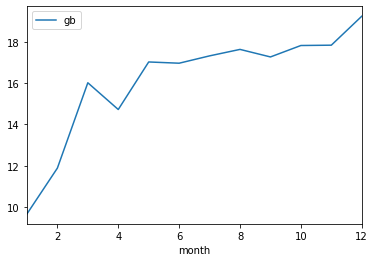

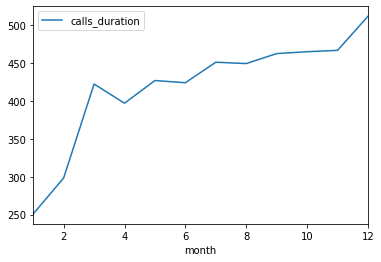

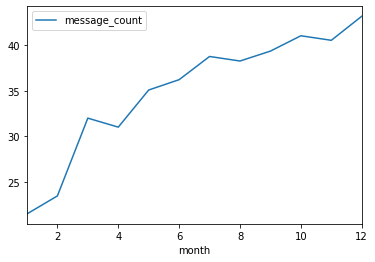

In [67]:
user_month_info.pivot_table(index = 'month',values = 'gb').plot()
user_month_info.pivot_table(index = 'month',values = 'calls_duration').plot()
user_month_info.pivot_table(index = 'month',values = 'message_count').plot()


Чем больше пользователей, тем больше трафик, звонки. Все логично

Посчитаем для каждого пользователя:

* помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика); 
* остаток умножем на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

In [68]:
def revenue(x):
    call = x['calls_duration']# это переменные по строкам которым соответсвует количество минут, интернета, сообщений
    internet = x['gb']
    message = x['message_count']
    tariff = x['tariff']
    
    if (tariff == 'smart'):
        i = 0
    else:
        i = 1
        
    call_over_tariff = tariffs.loc[i,'minutes_included'] -call # считаем остатки минут, гб(я округлил здесь, потому что раньше уже округлил до гб, и сообщений)
    internet_over_tariff = tariffs.loc[i,'mb_per_month_included']/1024 -internet
    message_over_tariff = tariffs.loc[i,'messages_included'] -message
    
    if call_over_tariff > 0:
        call_revenue = 0
    else:
        call_revenue = -call_over_tariff * tariffs.loc[i,'rub_per_minute']
    
    if internet_over_tariff > 0:
        internet_revenue = 0
    else:
        internet_revenue = -internet_over_tariff * tariffs.loc[i,'rub_per_gb']

    if message_over_tariff > 0:
        message_revenue = 0
    else:
        message_revenue = - message_over_tariff * tariffs.loc[i,'rub_per_message']

    revenue = call_revenue + internet_revenue + message_revenue + tariffs.loc[i,'rub_monthly_fee']
    return revenue
    
user_month_info['revenue'] = user_month_info.apply(revenue, axis = 1)


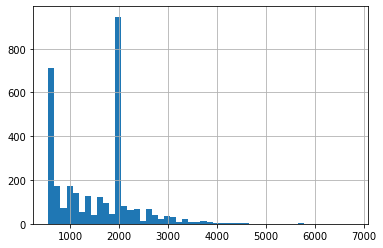

In [69]:
user_month_info['revenue'].hist(bins = 50)

Пики это абонентская плата за месяц, видно что не все пользователи укладываются в лимит

In [70]:
user_month_info.query('(revenue > 2000) and (tariff == "ultra")')#cо смартом за 2 тысячи выходят 395 раз, с ультра 134 раза, смарт выгоднрее для оператора

,user_id,month,calls_count,calls_duration,mb_used,gb,message_count,tariff,city,city_analyst,revenue
159,1024,11,157.0,1146.0,43107.47,43.0,0.0,ultra,Санкт-Петербург,другое,3900.0
160,1024,12,136.0,949.0,35948.13,36.0,0.0,ultra,Санкт-Петербург,другое,2850.0
311,1050,7,35.0,209.0,35177.91,35.0,52.0,ultra,Тюмень,другое,2700.0
383,1060,12,184.0,1233.0,43931.36,43.0,52.0,ultra,Калуга,другое,3900.0
782,1124,10,152.0,1225.0,49745.69,49.0,121.0,ultra,Махачкала,другое,4800.0
...,...,...,...,...,...,...,...,...,...,...,...
3195,1231,9,0.0,0.0,33189.47,33.0,188.0,ultra,Чебоксары,другое,2400.0
3196,1231,10,0.0,0.0,31032.93,31.0,185.0,ultra,Чебоксары,другое,2100.0
3198,1231,12,0.0,0.0,32448.00,32.0,191.0,ultra,Чебоксары,другое,2250.0
3200,1328,11,0.0,0.0,35525.58,35.0,8.0,ultra,Мурманск,другое,2700.0


In [71]:
user_month_info

,user_id,month,calls_count,calls_duration,mb_used,gb,message_count,tariff,city,city_analyst,revenue
0,1000,5,22.0,159.0,2253.49,3.0,22.0,ultra,Краснодар,другое,1950.0
1,1000,6,43.0,172.0,23233.77,23.0,60.0,ultra,Краснодар,другое,1950.0
2,1000,7,47.0,340.0,14003.64,14.0,75.0,ultra,Краснодар,другое,1950.0
3,1000,8,52.0,408.0,14055.93,14.0,81.0,ultra,Краснодар,другое,1950.0
4,1000,9,58.0,466.0,14568.91,15.0,57.0,ultra,Краснодар,другое,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,11050.56,11.0,17.0,smart,Санкт-Петербург,другое,550.0
3210,1489,9,0.0,0.0,17206.30,17.0,32.0,smart,Санкт-Петербург,другое,950.0
3211,1489,10,0.0,0.0,19559.44,20.0,21.0,smart,Санкт-Петербург,другое,1550.0
3212,1489,11,0.0,0.0,17491.56,18.0,20.0,smart,Санкт-Петербург,другое,1150.0


**Вывод:**

Создали одно большу сводную таблицу по пользователям и месяца, в которой отображены гб, минуты, количество звонков и смс, выделен город, и сколько пользователь тратит по своему тарифному плану.

В дальнейшем на основании этой таблицы будем строить выводы.

## Анализ данных 

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения.

In [72]:
#таблицы по разным тарифам
user_month_info_ultra = user_month_info.query('tariff == "ultra"')
user_month_info_smart = user_month_info.query('tariff == "smart"')



In [73]:
#таблица по средним
user_month_info_ultra_mean = user_month_info_ultra.pivot_table(index = 'month', values = {'calls_duration','gb','message_count'}, aggfunc = 'mean')
user_month_info_smart_mean = user_month_info_smart.pivot_table(index = 'month', values = {'calls_duration','gb','message_count'}, aggfunc = 'mean')
display(user_month_info_ultra_mean)
display(user_month_info_smart_mean)


,calls_duration,gb,message_count
month,,,
1,428.111111,13.222222,33.777778
2,297.125000,12.000000,21.958333
3,489.648649,17.648649,32.297297
4,458.018182,16.963636,31.563636
5,510.328358,19.373134,37.850746
6,479.702381,18.940476,41.726190
7,545.791209,20.505495,49.846154
8,510.775701,19.598131,48.439252
9,539.443478,19.243478,52.286957


,calls_duration,gb,message_count
month,,,
1,203.852941,8.735294,18.235294
2,298.689655,11.844828,24.086207
3,390.051948,15.233766,31.857143
4,367.133929,13.625000,30.741071
5,387.361702,15.907801,33.773050
6,395.640244,15.951220,33.402439
7,408.353234,15.875622,33.751244
8,421.468085,16.736170,33.638298
9,428.611538,16.392308,33.638462


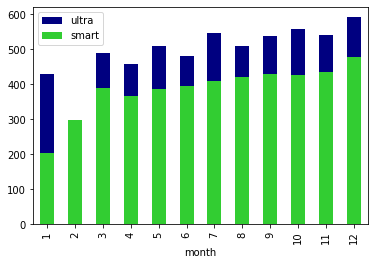

In [74]:
y = user_month_info_ultra_mean.plot(y = 'calls_duration',kind='bar',label='ultra', color = 'navy')
user_month_info_smart_mean.plot(y = 'calls_duration',kind='bar',label='smart',color= 'limegreen',ax = y)
#тут я так и не понял как поставить два столбца рядом, если не объединять это не в одну таблицу.

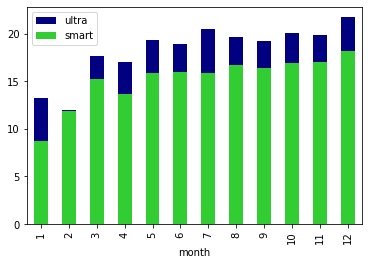

In [75]:
y = user_month_info_ultra_mean.plot(y = 'gb',kind='bar',label='ultra', color = 'navy')
user_month_info_smart_mean.plot(y = 'gb',kind='bar',label='smart',color= 'limegreen', ax = y)
plt.legend(['ultra', 'smart'])

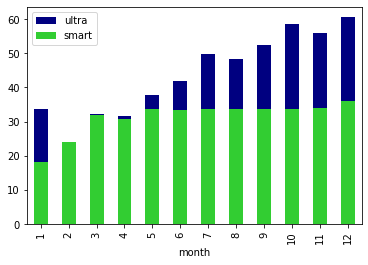

In [76]:
y = user_month_info_ultra_mean.plot(y = 'message_count',kind='bar',label='ultra', color = 'navy')
user_month_info_smart_mean.plot(y = 'message_count',kind='bar',label='smart',color= 'limegreen', ax = y)
plt.legend(['ultra', 'smart'])

По графикам видим,что получаем вывод, что пользователи тарифа ультра используют больше минут, гб и смс, но не в таком количестве какую предполгает их тариф

Ниже буду создавать сводную таблицу по среднему, дисперсии, стандартному отклонению. Я не понимаю для чего нам эта информация, и как ее здесь использовать, но раз задание есть-делаю.

In [77]:
#таблица по дисперсии
user_month_info_ultra_var = user_month_info_ultra.pivot_table(index = 'month', values = {'calls_duration','gb','message_count'}, aggfunc = (np.var))
user_month_info_smart_var = user_month_info_smart.pivot_table(index = 'month', values = {'calls_duration','gb','message_count'}, aggfunc = (np.var))
display(user_month_info_ultra_var)
display(user_month_info_smart_var)

,calls_duration,gb,message_count
month,,,
1,72769.361111,44.444444,940.694444
2,87919.679348,109.130435,716.824275
3,111384.900901,114.345345,1732.381381
4,71653.870034,89.443098,1407.287542
5,83870.193578,95.631389,1624.644052
6,91535.946500,82.394005,1986.297619
7,94322.278144,96.430525,2372.042735
8,97956.496385,105.148298,2171.739199
9,105716.775286,86.255988,2152.855530


,calls_duration,gb,message_count
month,,,
1,23787.341355,39.412656,262.367201
2,36412.287961,37.150938,473.097701
3,36823.155161,32.549897,718.492481
4,34778.207127,31.299550,602.139559
5,34820.061094,34.370010,730.990983
6,30742.918861,31.911716,806.806374
7,32250.269602,33.419453,799.887811
8,34793.583379,30.041207,838.257501
9,33535.342723,25.884110,790.617820


In [78]:
#таблица по стандартному отклонению
user_month_info_ultra_std = user_month_info_ultra.pivot_table(index = 'month', values = {'calls_duration','gb','message_count'}, aggfunc = (np.std))
user_month_info_smart_std = user_month_info_smart.pivot_table(index = 'month', values = {'calls_duration','gb','message_count'}, aggfunc = (np.std))
display(user_month_info_ultra_std)
display(user_month_info_smart_std)

,calls_duration,gb,message_count
month,,,
1,269.757968,6.666667,30.670742
2,296.512528,10.446551,26.773574
3,333.743765,10.693238,41.621886
4,267.682405,9.457436,37.513831
5,289.603511,9.779130,40.306874
6,302.549081,9.077114,44.567899
7,307.119322,9.819905,48.703621
8,312.980026,10.254184,46.601923
9,325.141162,9.287410,46.398874


,calls_duration,gb,message_count
month,,,
1,154.231454,6.277950,16.197753
2,190.820041,6.095157,21.750809
3,191.893604,5.705252,26.804710
4,186.489161,5.594600,24.538532
5,186.601343,5.862594,27.036845
6,175.336587,5.649046,28.404337
7,179.583601,5.780956,28.282288
8,186.530382,5.480986,28.952677
9,183.126576,5.087643,28.117927


In [79]:
#общая по среднему, стандартному, и дисперсии
user_month_info_ultra_all = user_month_info_ultra_std.merge(user_month_info_ultra_mean, left_index = True,right_index = True, how = 'left',suffixes=('_std', '_mean')).merge(user_month_info_ultra_var, left_index = True,right_index = True, how = 'left')
user_month_info_ultra_all.rename(columns = {'calls_duration' :'calls_duration_var','gb' :'gb_var','message_count' :'message_count_var'}, inplace = True)

user_month_info_smart_all = user_month_info_smart_std.merge(user_month_info_smart_mean, left_index = True,right_index = True, how = 'left',suffixes=('_std', '_mean')).merge(user_month_info_smart_var, left_index = True,right_index = True, how = 'left')
user_month_info_smart_all.rename(columns = {'calls_duration' :'calls_duration_var','gb' :'gb_var','message_count' :'message_count_var'}, inplace = True)

display(user_month_info_ultra_all)
display(user_month_info_smart_all)

,calls_duration_std,gb_std,message_count_std,calls_duration_mean,gb_mean,message_count_mean,calls_duration_var,gb_var,message_count_var
month,,,,,,,,,
1,269.757968,6.666667,30.670742,428.111111,13.222222,33.777778,72769.361111,44.444444,940.694444
2,296.512528,10.446551,26.773574,297.125000,12.000000,21.958333,87919.679348,109.130435,716.824275
3,333.743765,10.693238,41.621886,489.648649,17.648649,32.297297,111384.900901,114.345345,1732.381381
4,267.682405,9.457436,37.513831,458.018182,16.963636,31.563636,71653.870034,89.443098,1407.287542
5,289.603511,9.779130,40.306874,510.328358,19.373134,37.850746,83870.193578,95.631389,1624.644052
6,302.549081,9.077114,44.567899,479.702381,18.940476,41.726190,91535.946500,82.394005,1986.297619
7,307.119322,9.819905,48.703621,545.791209,20.505495,49.846154,94322.278144,96.430525,2372.042735
8,312.980026,10.254184,46.601923,510.775701,19.598131,48.439252,97956.496385,105.148298,2171.739199
9,325.141162,9.287410,46.398874,539.443478,19.243478,52.286957,105716.775286,86.255988,2152.855530


,calls_duration_std,gb_std,message_count_std,calls_duration_mean,gb_mean,message_count_mean,calls_duration_var,gb_var,message_count_var
month,,,,,,,,,
1,154.231454,6.277950,16.197753,203.852941,8.735294,18.235294,23787.341355,39.412656,262.367201
2,190.820041,6.095157,21.750809,298.689655,11.844828,24.086207,36412.287961,37.150938,473.097701
3,191.893604,5.705252,26.804710,390.051948,15.233766,31.857143,36823.155161,32.549897,718.492481
4,186.489161,5.594600,24.538532,367.133929,13.625000,30.741071,34778.207127,31.299550,602.139559
5,186.601343,5.862594,27.036845,387.361702,15.907801,33.773050,34820.061094,34.370010,730.990983
6,175.336587,5.649046,28.404337,395.640244,15.951220,33.402439,30742.918861,31.911716,806.806374
7,179.583601,5.780956,28.282288,408.353234,15.875622,33.751244,32250.269602,33.419453,799.887811
8,186.530382,5.480986,28.952677,421.468085,16.736170,33.638298,34793.583379,30.041207,838.257501
9,183.126576,5.087643,28.117927,428.611538,16.392308,33.638462,33535.342723,25.884110,790.617820


Получили таблицу по дисперсии, стнадартному отклонению, и среднему

Text(0, 0.5, 'смс')

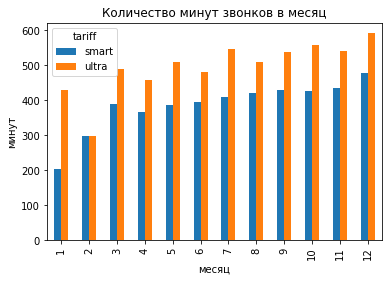

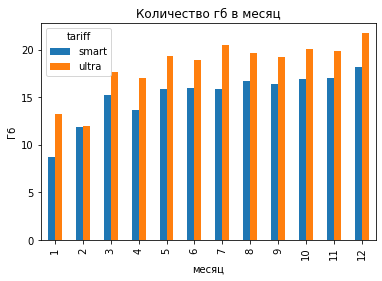

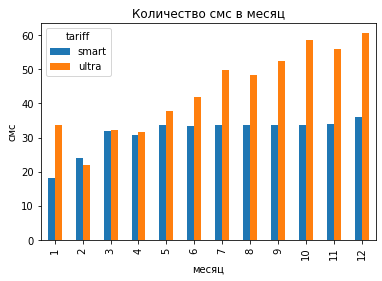

In [80]:
user_month_info_calls = user_month_info.pivot_table(index = 'month', columns = 'tariff',values = 'calls_duration', aggfunc = 'mean')
user_month_info_gb = user_month_info.pivot_table(index = 'month', columns = 'tariff',values = 'gb', aggfunc = 'mean')
user_month_info_message = user_month_info.pivot_table(index = 'month', columns = 'tariff',values = 'message_count', aggfunc = 'mean')
user_month_info_calls.plot(kind = 'bar')
plt.title("Количество минут звонков в месяц")
plt.xlabel("месяц")
plt.ylabel("минут")
user_month_info_gb.plot(kind = 'bar')
plt.title("Количество гб в месяц")
plt.xlabel("месяц")
plt.ylabel("Гб")
user_month_info_message.plot(kind = 'bar')
plt.title("Количество смс в месяц")
plt.xlabel("месяц")
plt.ylabel("смс")

В среднем пользователи тарифа ультра пользуются всем больше, чем пользователи смарт тарифа, однако разрыв судя по графикам не такой большой особенно в трафике и звонках. Что интрересно, пользователи утльтра в среднем далеки от исчерпания полного пакета, который дает им оператор. Пользователи смарт "уходят" за 15 гб почти всегда начиная с июня. По смс и звонкам в срднем пользователи не уходят за границы своих тарифов.

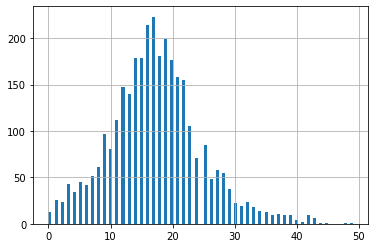

In [81]:
user_month_info['gb'].hist(bins = 100)

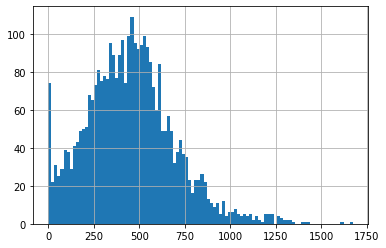

In [82]:
user_month_info['calls_duration'].hist(bins = 100)

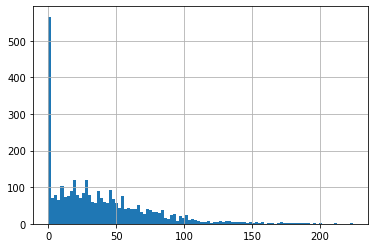

In [83]:
user_month_info['message_count'].hist(bins = 100)

По всем тарифам чаще всего используют от 15-20 гб трафика. Чаще всего говорят около 500 минут в месяц, и не отправляют сообщений или отправляют очень мало

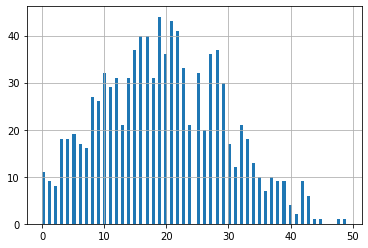

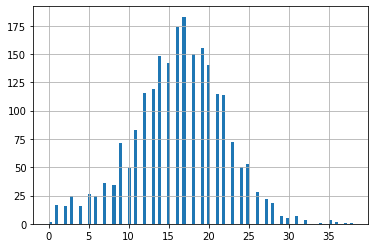

In [84]:
plt.figure()
user_month_info_ultra['gb'].hist(bins = 100)
plt.figure()
user_month_info_smart['gb'].hist(bins = 100)


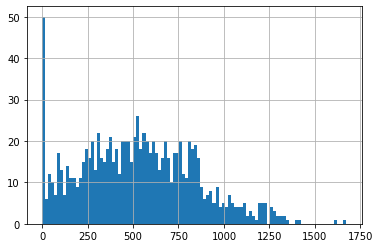

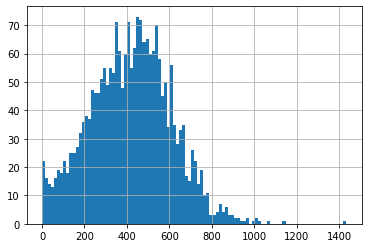

In [85]:
plt.figure()
user_month_info_ultra['calls_duration'].hist(bins = 100)
plt.figure()
user_month_info_smart['calls_duration'].hist(bins = 100)

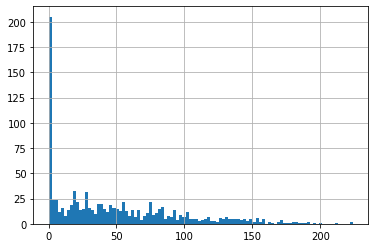

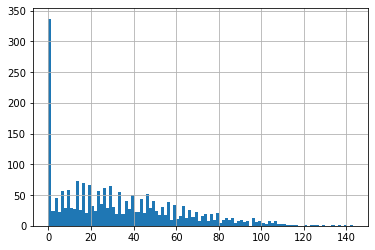

In [86]:
plt.figure()
user_month_info_ultra['message_count'].hist(bins = 100)
plt.figure()
user_month_info_smart['message_count'].hist(bins = 100)

**Вывод:** 
Интересно что смс равно непопулярны по всем тарифам. На тарифах смарт распределение звонком по минутам более равномерно,чем на тарифах ультра, где чаще говорят от 300 до 600 минут.Интернетом больше пользуются на тарифах ультра, есть более заметная группа кто использует больше 30 гб в месяц. Смс равно непопулярны на двух тарифах, этим кстати можно объяснить относительную непопулярность тарифа ультра, например я бы не стал платить за смс которыми даже не пользуюьсь, а гб трафика сложнее спрогнозировать, поэтому в какие то месяцы тратишь больше, в другие меньше, и многие скорее всего не хотят платить каждый месяц большую сумму, и они готовы в один конркетный месяц заплатить больше, но в дургие меньше(по своему тарифу). Конечно тут "направшивается" тарифный план где больше интернет трафика чем в смарт, но цена ниже чем в ультра, но без лишних смс, такой тариф скорее всего был бы самым популярным

## Проверка гипотез

1)Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

Сформируем нулевую гипотезу: что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
Сформируем альтернативну гипотезу: что средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны



In [87]:
alpha = 0.05
s_rev = user_month_info_smart['revenue']
u_rev = user_month_info_ultra['revenue']
results = st.ttest_ind(s_rev,u_rev)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


**Делаем вывод, что выручка по двум тарифам не равна**

2)Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформируем нулевую гипотезу: что средняя выручка пользователей из Москвы неотличается от выручки пользователей из других регионов

Сформируем альтернативную гипотезу: что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [88]:
m_rev = user_month_info[user_month_info['city_analyst']=='Москва']['revenue']
o_rev = user_month_info[user_month_info['city_analyst']=='другое']['revenue']
results = st.ttest_ind(m_rev,o_rev)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


In [89]:
display(user_month_info_smart['revenue'].mean())
display(user_month_info_ultra['revenue'].mean())

1289.9735307312696

2070.1522842639592

**Вывод:** в Москве и регионах средняя выручка равны

## Общий вывод

Были проверены гипотезы о том, что 
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Первую мы подтвердилди,а вторую опровергли
Конечно с точки зрения ежемесячных платежей, для оператора выгоднее тариф "ультра", однако по тарифу "смарт" гораздо чаще происходят превышения ежемесячных платежей, в то же время по "ультра" почти все укладываются в пакет.

С точки зрения нагрузки на инфраструктуру оператора, и расчетов сколько стоит передача 1 гб трафика нельзя сказать что "ультра" тариф лучше для оператора, тут не хватает данных. А так самый очевидный вывод, что где больше абонентская плата тот и приносит больше денег.


